In [ ]:
#Dataset 2: flower_photos
local_zip = "/content/flower.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()


base_dir = '/content/flower_photos'
train_dir = os.path.join(base_dir,'/content/flower_photos/Train')
validation_dir = os.path.join(base_dir,'/content/flower_photos/Val')

train_roses_dir = os.path.join(train_dir,'roses')

train_sunflower_dir = os.path.join(validation_dir,'sunflowers')

validation_roses_dir = os.path.join(validation_dir,'roses')

validation_sunflowers_dir = os.path.join(validation_dir,'sunflowers')

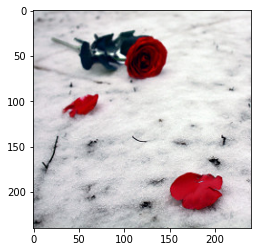

In [ ]:
roseimage = plt.imread('/content/flower_photos/Train/roses/6803363808_9f9ce98186_m.jpg')
plt.imshow(roseimage)
plt.show()

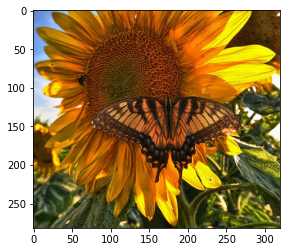

In [ ]:
sunflowerimage = plt.imread('/content/flower_photos/Train/sunflowers/9483429732_5ae73eb672_n.jpg')
plt.imshow(sunflowerimage)
plt.show()

In [ ]:
roseimage.shape, sunflowerimage.shape

In [ ]:
from tensorflow import keras
model= keras.models.Sequential()
model.add(keras.layers.Input(shape=(150, 150, 3)))
model.add(keras.layers.Conv2D(16, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(32, 3, activation='relu'))  
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
traingen = ImageDataGenerator(rescale=1./255)
validationgen = ImageDataGenerator(rescale=1./255)
traingenerator = traingen.flow_from_directory(train_dir,
                                              target_size=(150, 150),batch_size=20,class_mode='binary')
validationgenerator = validationgen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1010 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


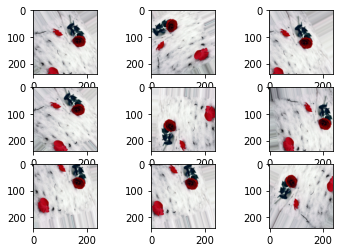

In [ ]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
image = load_img('/content/flower_photos/Train/roses/6803363808_9f9ce98186_m.jpg')
# convert to numpy array
data = img_to_array(image)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=48, height_shift_range=48,
                             rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

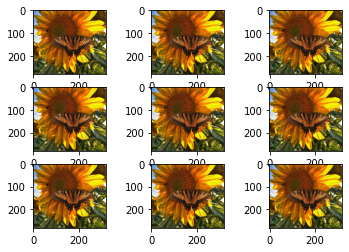

In [ ]:
image2 = load_img('/content/flower_photos/Train/sunflowers/9483429732_5ae73eb672_n.jpg')
data2 = img_to_array(image2)
# expand dimension to one sample
samples = expand_dims(data2, 0)
# create image data augmentation generator
datagen2 = ImageDataGenerator(width_shift_range=48, height_shift_range=48,
                              rotation_range=90)
# prepare iterator
it = datagen2.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image2)
# show the figure
pyplot.show()

In [ ]:
history = model.fit_generator(
      traingenerator,
      steps_per_epoch=50,  
      epochs=50,
      validation_data=validationgenerator,
      validation_steps=17,  
      verbose=2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


50/50 - 24s - loss: 0.9542 - acc: 0.7697 - val_loss: 0.3338 - val_acc: 0.8636 - 24s/epoch - 481ms/step
Epoch 2/50
50/50 - 23s - loss: 0.3107 - acc: 0.8747 - val_loss: 0.2433 - val_acc: 0.9030 - 23s/epoch - 457ms/step
Epoch 3/50
50/50 - 23s - loss: 0.2341 - acc: 0.9030 - val_loss: 0.2637 - val_acc: 0.8909 - 23s/epoch - 465ms/step
Epoch 4/50
50/50 - 23s - loss: 0.2143 - acc: 0.9232 - val_loss: 0.4565 - val_acc: 0.8697 - 23s/epoch - 453ms/step
Epoch 5/50
50/50 - 24s - loss: 0.1691 - acc: 0.9414 - val_loss: 0.1840 - val_acc: 0.9273 - 24s/epoch - 482ms/step
Epoch 6/50
50/50 - 24s - loss: 0.1291 - acc: 0.9545 - val_loss: 0.2660 - val_acc: 0.9121 - 24s/epoch - 475ms/step
Epoch 7/50
50/50 - 24s - loss: 0.1096 - acc: 0.9636 - val_loss: 0.2524 - val_acc: 0.9091 - 24s/epoch - 473ms/step
Epoch 8/50
50/50 - 24s - loss: 0.0799 - acc: 0.9747 - val_loss: 0.2731 - val_acc: 0.9182 - 24s/epoch - 474ms/step
Epoch 9/50
50/50 - 23s - loss: 0.0870 - acc: 0.9717 - val_loss: 0.2869 - val_acc: 0.9182 - 23s/epoc

In [ ]:
import numpy as np
acc = history.history['acc']
print(np.mean(acc))

0.9805658566951752


In [ ]:
val_acc = history.history['val_acc']
print(np.mean(val_acc))

0.8995151531696319


In [ ]:
from tensorflow import keras
model2= keras.models.Sequential()
model2.add(keras.layers.Input(shape=(150, 150, 3)))
model2.add(keras.layers.Conv2D(16, 3, activation='relu'))
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Conv2D(32, 3, activation='relu'))  
model2.add(keras.layers.MaxPooling2D(2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model2.fit_generator(
      traingenerator,
      steps_per_epoch=50,  
      epochs=50,
      validation_data=validationgenerator,
      validation_steps=17,  
      verbose=2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


50/50 - 25s - loss: 1.0027 - acc: 0.7515 - val_loss: 0.2594 - val_acc: 0.9030 - 25s/epoch - 502ms/step
Epoch 2/50
50/50 - 24s - loss: 0.3132 - acc: 0.8808 - val_loss: 0.2624 - val_acc: 0.9091 - 24s/epoch - 481ms/step
Epoch 3/50
50/50 - 24s - loss: 0.2703 - acc: 0.8970 - val_loss: 0.2595 - val_acc: 0.9061 - 24s/epoch - 483ms/step
Epoch 4/50
50/50 - 28s - loss: 0.2028 - acc: 0.9293 - val_loss: 0.2665 - val_acc: 0.9030 - 28s/epoch - 552ms/step
Epoch 5/50
50/50 - 29s - loss: 0.1492 - acc: 0.9424 - val_loss: 0.3561 - val_acc: 0.8788 - 29s/epoch - 588ms/step
Epoch 6/50
50/50 - 27s - loss: 0.1148 - acc: 0.9636 - val_loss: 0.2925 - val_acc: 0.9121 - 27s/epoch - 543ms/step
Epoch 7/50
50/50 - 30s - loss: 0.1381 - acc: 0.9596 - val_loss: 0.2481 - val_acc: 0.9212 - 30s/epoch - 600ms/step
Epoch 8/50
50/50 - 26s - loss: 0.0668 - acc: 0.9778 - val_loss: 0.2863 - val_acc: 0.9030 - 26s/epoch - 512ms/step
Epoch 9/50
50/50 - 24s - loss: 0.0788 - acc: 0.9758 - val_loss: 0.4148 - val_acc: 0.9000 - 24s/epoc

In [ ]:
import numpy as np
acc = history.history['acc']
print(np.mean(acc))

0.9797791874408722


In [ ]:
val_acc = history.history['val_acc']
print(np.mean(val_acc))

0.9025454473495483
